In [2]:
import os

os.system("pip install -r requirements.txt")
print("Librerías instaladas.")

Librerías instaladas.


# Dataset

Tenemos el siguiente dataset que contiene diferentes modelos de carros con sus respectivas características.

In [3]:
import seaborn as sns

# Cargamos dataset MPG
data = sns.load_dataset('mpg').dropna()

data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## Contexto del Problema

A continuación se presentan distintos escenarios donde es importante tener una relación entre las variables y tratar de predecir algo sobre la variable objetivo del anterior dataset:

### 1. Optimización del consumo de combustible en la industria automotriz

**Problema**: Los fabricantes de automóviles desean diseñar vehículos más eficientes en consumo de combustible para cumplir con regulaciones ambientales y reducir costos operativos para los consumidores.

**Objetivo**: Predecir el consumo de combustible (medido en millas por galón, MPG) en función de características como el peso del vehículo y la potencia del motor. Esto les permite identificar configuraciones óptimas de diseño.

Las preguntas clave para el problema son:
- ¿Cómo afecta el peso o la potencia del motor al consumo de combustible?
- ¿Qué configuraciones deben evitarse para maximizar la eficiencia?

### 2. Evaluación del impacto ambiental de vehículos

**Problema:** Las agencias ambientales buscan monitorear el impacto de diferentes vehículos en el medio ambiente, ya que un menor MPG está relacionado con mayores emisiones de carbono.

**Objetivo:** Crear un modelo que prediga el MPG para determinar qué vehículos contribuyen menos al cambio climático y sugerir políticas que incentiven la producción de vehículos más eficientes.

Las preguntas clave para el problema son:
- ¿Qué características contribuyen más al bajo rendimiento de combustible?
- ¿Cómo se podría incentivar el diseño de vehículos más livianos o menos potentes?


### 3. Herramienta para consumidores

**Problema:** Los consumidores quieren tomar decisiones informadas al comprar un vehículo, priorizando la economía de combustible para reducir costos en gasolina.

**Objetivo:** Diseñar un modelo de predicción que permita a los consumidores calcular el MPG esperado según el peso y la potencia del motor de un vehículo, ayudándolos a elegir modelos más eficientes.

Las preguntas clave para el problema son:
- ¿Qué rendimiento pueden esperar de un vehículo específico?
- ¿Qué combinación de características maximiza la eficiencia?

## Preparación de los datos

Vamos a centrarnos en las siguientes características:
- Weight: Representa el peso del vehículo en libras.
- Horsepower: Representa la potencia del motor, medida en caballos de fuerza.
- MPG:  Es el rendimiento del vehículo en términos de eficiencia de combustible, es decir, cuántas millas puede recorrer un vehículo por cada galón de combustible. Es la variable objetivo en el modelo de predicción.



In [4]:
# Definimos las Características y la Variable Objetivo
X = data[['weight', 'horsepower']]  # Características
y = data['mpg']                     # Objetivo (miles per gallon)

df = X.copy()
df['MPG'] = y

df

,weight,horsepower,MPG
0,3504,130.0,18.0
1,3693,165.0,15.0
2,3436,150.0,18.0
3,3433,150.0,16.0
4,3449,140.0,17.0
...,...,...,...
393,2790,86.0,27.0
394,2130,52.0,44.0
395,2295,84.0,32.0
396,2625,79.0,28.0


Particionamos el dataset para train y test.

In [5]:
from sklearn.model_selection import train_test_split

# Particionamos el dataset en porporción 20/80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Muestras de entrenamiento: {len(X_train)}")
print(f"Muestras de prueba: {len(X_test)}")

Muestras de entrenamiento: 313
Muestras de prueba: 79


# Regresión Lineal (Scikit-Learn)

Construimos el modelo de regresión lineal haciendo uso de la librería scikit-learn:

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inicializamos el modelo de regresión lineal y se entrena
model = LinearRegression()
model.fit(X_train, y_train)

# Obtenemos las predicciones
y_pred = model.predict(X_test)

# Evaluamos los resultados
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Scikit-learn MSE: {mse:.2f}")
print(f"Scikit-learn R2: {r2:.2f}")

Scikit-learn MSE: 17.79
Scikit-learn R2: 0.65


# Regresión Lineal (Ecuaciones Normales)

Entrenamos el modelo usando las ecuaciones normales halladas en la parte teórica, para comparar con el modelo implementado con scikit-learn:

In [7]:
import numpy as np

# Añadimos una columna de unos al principio,
# la cual nos proporcionará el intercepto de la recta.
X_train_np = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_np = np.c_[np.ones(X_test.shape[0]), X_test]

# Se calculan los coeficientes usando las ecuaciones normales.
beta = np.linalg.inv(X_train_np.T @ X_train_np) @ X_train_np.T @ y_train

# Obtenemos las predicciones
y_pred_manual = X_test_np @ beta

# Evaluamos los resultados
mse_manual = mean_squared_error(y_test, y_pred_manual)
r2_manual = r2_score(y_test, y_pred_manual)

print(f"Manual MSE: {mse_manual:.2f}")
print(f"Manual R2: {r2_manual:.2f}")

Manual MSE: 17.79
Manual R2: 0.65


# Visualización

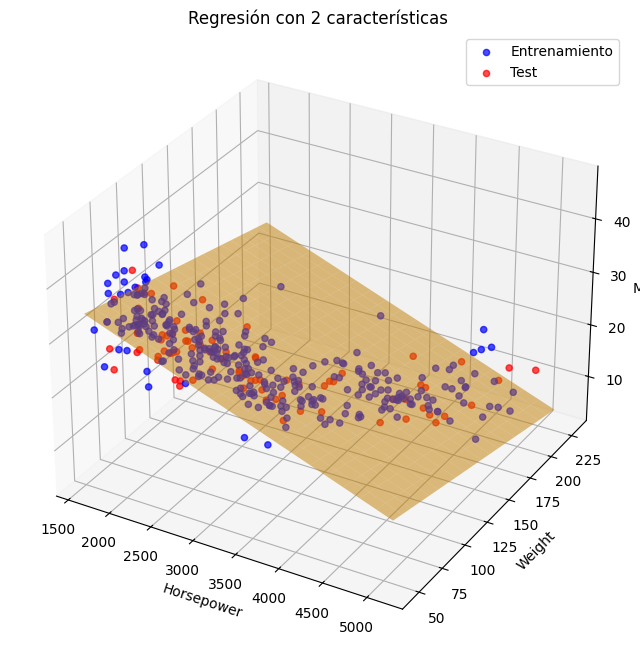

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

X_train_3d = X_train[['weight', 'horsepower']].values
X_test_3d = X_test[['weight', 'horsepower']].values

x1_range = np.linspace(X_train_3d[:, 0].min(), X_train_3d[:, 0].max(), 20)
x2_range = np.linspace(X_train_3d[:, 1].min(), X_train_3d[:, 1].max(), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
y_pred_plane = (model.intercept_ +
                model.coef_[0] * x1_mesh +
                model.coef_[1] * x2_mesh)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_3d[:, 0], X_train_3d[:, 1], y_train, color='blue', label='Entrenamiento', alpha=0.7)

ax.scatter(X_test_3d[:, 0], X_test_3d[:, 1], y_test, color='red', label='Test', alpha=0.7)

ax.plot_surface(x1_mesh, x2_mesh, y_pred_plane, color='orange', alpha=0.5)

ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('MPG')
ax.set_title('Regresión con 2 características')
ax.legend()

plt.show()

# Análisis del modelo
## Análisis e interpretacion de los resultados del modelo de mínimos cuadrados
La idea a lo largo del trabajo es revisar la relación de estas tres variables importantes para lograr la optimización en el combustible de los diferentes automóviles del mercado, esto es de gran interés para algunas empresas y de hecho para cualquier persona del común que se dedique al transporte. Es relevante que cada individuo con su automóvil pueda ver el cambio en el consumo de combustible y la distancia recorrida afectada por el peso del vehículo o por los caballos de potencia del mismo.

Curiosamente es una de las preguntas que uno de los integrantes del grupo se propuso cuando se dio cuenta que nunca medía el consumo de combustible en relación con las variables mencionadas anteriormente cuando hacía los servicios desde su casa hasta el Aeropuerto separados por una distancia de cinco kilómetros, por lo general las personas del común no hacen este cálculo estrictamente sino que lo toman por referencia por los trayectos que ya han recorrido o por recomendaciones de otros conductores con mucha más experiencia. En nuestro caso tomamos los valores reales del Hyundai Getz modelo 2011 y con su ficha técnica accedimos a los datos del peso y los caballos de fuerza, es impresionante que este valor de consumo de combustible por milla recorrida siempre fuera una incógnita ya que el único cálculo con el que se medía la rentabilidad en cada uno de los servicios realizados era el número de trayectos ayudado de que siempre se hacían los mismos recorridos o distancias en un tiempo determinado y siempre se recargaba el automóvil con la misma cantidad de gasolina, esto ayuda a saber cuántos trayectos ida y vuelta se realizan agotando la cuarta parte del tanque poniendo este caso puntual.

El consumo de gasolina en relación con el peso del vehículo y los caballos de fuerza es un tema de interés para diversas empresas y sectores, especialmente aquellos involucrados en transporte, logística y fabricación automotriz. Las que nos parecen más relevantes son los gobiernos y agencias reguladoras ya que con estos datos arrojados por el modelo pueden ver el impacto en el medio ambiente y establecer regulaciones para reducir emisiones, además, con respecto a otro apartado del trabajo en el que veíamos la relación con el análisis de datos, existen empresas de tecnología como AVL que desarrollan software para modelar el consumo de combustible con base en las variables de peso y los caballos de fuerza. Otro ejemplo muy interesante es la compañía Uber que necesita obtener estos datos para  calcular el costo por viaje y mantener la eficiencia operativa.

Usando nuestro modelo con el carro Hyundai 2011, que en su ficha técnica observamos que pesa 1.100 kilogramos y que tiene 97 caballos de fuerza, nos arroja el modelo que puede recorrer 27,29 millas por galón lo que equivale a 43,91 kilómetros, teniendo en cuenta que acá en Colombia actualmente un galón de gasolina cuesta 16.000 COP aproximadamente, entonces este vehículo gastaría 16.000 pesos colombianos por cada 44 kilómetros recorridos, es decir 363 pesos por kilómetro recorrido. En este caso no estamos considerando el peso de ningún agente externo al vehículo, si colocaramos una situación real en donde por ejemplo vaya el conductor acompañado de dos pasajeros y además de una maleta promedio de viaje de 23kg, teniendo en cuenta también en promedio el peso de las personas de 60 kg entonces tendríamos ahora una variación en el peso adicionando unos 200 kilos más a nuestra variable, ahora con nuestro modelo calculamos las millas por galón pero con el nuevo peso de 1.300 kilogramos y nos arroja que podemos recorrer 24,70 millas por cada galón de gasolina, un poco menos debido al aumento del peso ya que el vehículo ahora necesita más energía para mover el automóvil, traducido a rentabilidades por trayecto y teniendo en cuenta el precio del galón de gasolina podemos ver que nos cuesta 16.000 COP movernos 24,70 millas convertido a kilómetros serían 39,75km , entonces cada kilómetro recorrido nos cuesta ahora 647 pesos colombianos.

Casi el doble de dinero nos representa en ese cambio de peso por kilómetro recorrido, es algo que una persona del común de pronto no reconoce y no dimensiona esta diferencia, además de que nunca se considera esta variable a la hora de ver que tan rentable es trabajar en este área de transporte por ejemplo, entonces para concluir notamos la importancia del peso en el gasto asociado y cómo esto aumenta también los efectos contaminantes en las ciudades simplemente considerando un caso en el que no se lleva tanta carga ya que en otros procesos de transporte se puede hasta llegar a duplicar el peso del automóvil llevando material, entonces los esfuerzos y los precios podrían también llegar a sorprender y definitivamente ser considerados a la hora de gestionar un buen servicio.

## La calidad de la precisión del modelo y sus limitaciones
Como vimos anteriormente tenemos que el Error Cuadrático Medio es de 17,79. Este valor representa el promedio de los errores de predicción al cuadrado, como vemos que los valores reales de las millas por galón en el dataset van de 9 a 46 millas por galón, significa que nuestro modelo se equivoca en aproximadamente 4,22 millas por galón en sus predicciones. Esto significa que si te dice que tu auto alcanza las 25 millas por galón, en realidad podría estar entre 21 y 29 millas por galón. Esta prediccion no es muy precisa, pero es suficiente para tener una idea general y muy bien para el conjunto de datos que usamos.

Nuestro R2 es 0,65 esto es un valor moderado, significa que nuestro modelo, de 100 autos que predice, el 65% fueron de forma acertada. Esto puede parecer bajo, pero debido a que el tema tratado tiene otros factores no incluidos y relaciones no lineales, es moderadamente bueno.

## Evaluación y mejoras del modelo de regresión lineal para predecir el consumo de combustible:
El modelo de regresión lineal utilizado presenta una aproximación estimada moderada y buena, explicando aproximadamente el 65% de la variabilidad en el consumo de combustible. Sin embargo, el error cuadrático medio es relativamente alto, lo que sugiere que las predicciones pueden no ser siempre precisas.
Las limitaciones del modelo incluyen la suposición de una relación lineal entre las variables, la falta de consideración de interacciones entre características, la naturaleza de los datos. Para mejorar el modelo, se pueden explorar técnicas de modelado no lineal, realizar ingeniería de características, manejar unos datos más robustos, ya que el conjunto que utilizamos es de 400 datos e incluir características adicionales como lo es el año del vehículo o su aceleración. En general, el modelo actual proporciona una base sólida para la predicción de las millas recorridas por galón, pero es posible mejorar su precisión.

# Bibliografía

- Géron A. (2018). ***Hands-On Machine Learning with Scikit-Learn & TensorFlow (5th Edition, Chapter 4)***. O'Reilly